In [143]:
%load_ext autoreload
%autoreload 2

from PyDeep import *
from sklearn.datasets import make_regression, make_classification, make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [209]:
SEED = 12

# Regression

In [210]:
N, D, K, b = 1000, 1, 1, 10

X, Y = make_regression(n_samples=N, n_features=D, n_targets=K, bias=b, noise=20, random_state=SEED)
if K == 1:  Y = Y[..., None]

# X, Y = make_moons(n_samples=N)
# Y = Y[..., None]

In [211]:
reg_model = Sequential(Linear(D, D*3),
                Linear(D*3, K))

criterion = MSE()

optim = SGD(reg_model, 1e-3)

routine = Trainer(X=X, Y=Y, model=reg_model, criterion=criterion, optim=optim, batch_size=32, epochs=1000, train_size=0.5, pace_eval_test=2, seed=SEED)

init_pred = reg_model(np.arange(np.min(X), np.max(X) + 1)[:, None])

TRAINING: 100%|██████████| 1000/1000 [00:04<00:00, 239.73it/s]


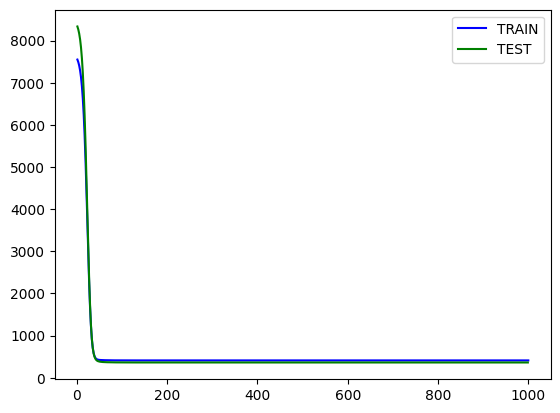

In [212]:
utils.plot(
    (*(rez := routine.training())[:2], "TRAIN"),
    (*rez[2:], "TEST")
)

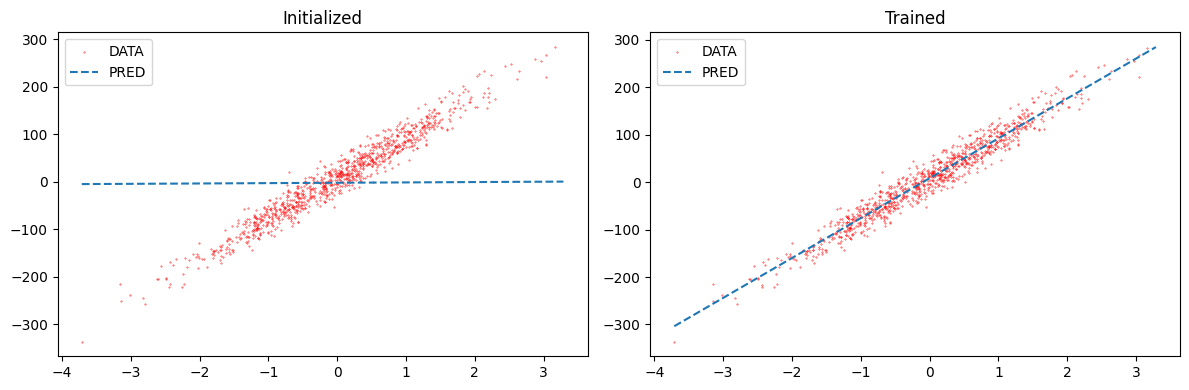

In [213]:
x_range = np.arange(np.min(X), np.max(X) + 1)[:, None]

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(X[:, 0], Y[:, 0], s=0.1, label="DATA", c="red")
axes[0].plot(x_range[:, 0], init_pred[:, 0], linestyle="--", label="PRED")
axes[0].set_title("Initialized")
axes[0].legend()

axes[1].scatter(X[:, 0], Y[:, 0], s=0.1, label="DATA", c="red")
axes[1].plot(x_range[:, 0], reg_model(x_range)[:, 0], linestyle="--", label="PRED")
axes[1].set_title("Trained")
axes[1].legend()

plt.tight_layout()
plt.show()

# Binary classification

In [214]:
N, D, K = 1000, 2, 2

X, Y = make_moons(n_samples=N)
Y = Y[..., None]

In [230]:
bclf_model = Sequential(
                Linear(D, D*3),
                Tanh(D*3),       
                Linear(D*3, K),
                Tanh(K),
                Linear(K, K-1),
                Sigmoid(K-1))

criterion = BCE()

optim = SGD(bclf_model, 1e-2)

routine = Trainer(X=X, Y=Y, model=bclf_model, criterion=criterion, optim=optim, batch_size=32, epochs=2000, train_size=0.99, pace_eval_test=2, seed=SEED)

In [231]:
init = utils.decision_boundary(X, lambda x: np.where(bclf_model(x) >= 0.5, 1, 0))

TRAINING:   0%|          | 0/2000 [00:00<?, ?it/s]

TRAINING: 100%|██████████| 2000/2000 [00:32<00:00, 60.67it/s]


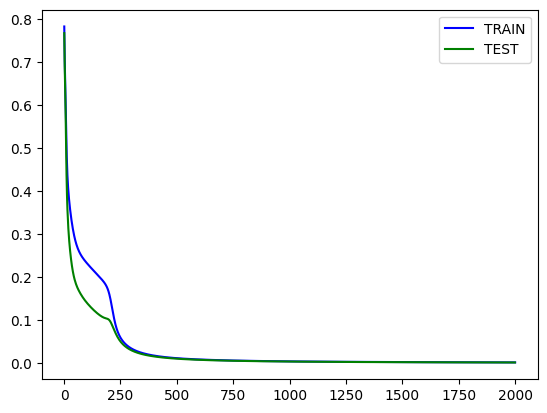

In [232]:
utils.plot(
    (*(rez := routine.training())[:2], "TRAIN"),
    (*rez[2:], "TEST")
)

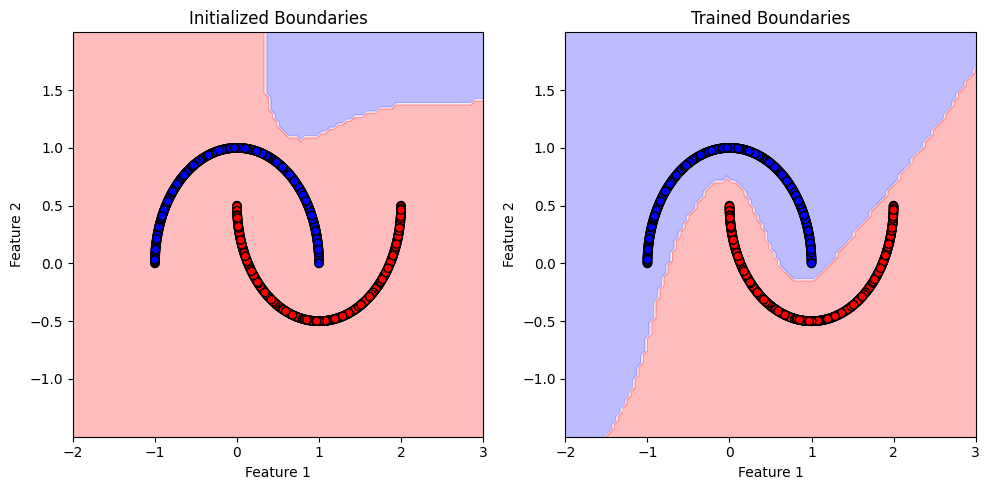

In [233]:
utils.boundary_comparison(X, Y, lambda x: np.where(bclf_model(x) >= 0.5, 1, 0), init)